# Dummy Variable Regression
Our starting point for understanding the use of categorical predictors in multiple regression is to discuss *how* this is achieved via *dummy variables*. Once we have established the theory of dummy variables, we will be able to see how the humble $t$-test can be reinterpreted as a regression model. This is then the starting point for understanding how one-way ANOVA, factorial ANOVA and ANCOVA models can all be subsumed under this single framework.

## Dummy Variables
In order to integrate a categorical variable into a regression model, we use what is known as a *dummy variable*. This is a new variable that we insert into the regression model that only has values of '0' or '1'. As an example, let us return to the `mtcars` dataset and create a new categorical variable that indicates whether a car was manufactured in the USA or somewhere else in the world.

In [2]:
data(mtcars)
mtcars$origin <- c('Other','Other','USA','USA','USA','USA','USA','Other','Other','Other',
                   'Other','Other','Other','Other','USA','USA','USA','Other','Other',
                   'Other','Other','USA','USA','USA','USA','Other','Other','Other',
                   'USA','Other','Other','Other')

print(mtcars)

                     mpg cyl  disp  hp drat    wt  qsec vs am gear carb origin
Mazda RX4           21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4  Other
Mazda RX4 Wag       21.0   6 160.0 110 3.90 2.875 17.02  0  1    4    4  Other
Datsun 710          22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1    USA
Hornet 4 Drive      21.4   6 258.0 110 3.08 3.215 19.44  1  0    3    1    USA
Hornet Sportabout   18.7   8 360.0 175 3.15 3.440 17.02  0  0    3    2    USA
Valiant             18.1   6 225.0 105 2.76 3.460 20.22  1  0    3    1    USA
Duster 360          14.3   8 360.0 245 3.21 3.570 15.84  0  0    3    4    USA
Merc 240D           24.4   4 146.7  62 3.69 3.190 20.00  1  0    4    2  Other
Merc 230            22.8   4 140.8  95 3.92 3.150 22.90  1  0    4    2  Other
Merc 280            19.2   6 167.6 123 3.92 3.440 18.30  1  0    4    4  Other
Merc 280C           17.8   6 167.6 123 3.92 3.440 18.90  1  0    4    4  Other
Merc 450SE          16.4   8 275.8 180 3.07 4.070 17

In order to turn this variable into a dummy variable, we could assign a value of 0 to the `Other` category and a value of 1 to the `USA` category. This gives us the following coding scheme 

| Category | Dummy Value |
| -------- | ----------- |
| Other    | 0           |
| USA      | 1           |

We can choose to code the categories the other way around and will see the consequences of this choice a little later.

### Manual Dummy Variables
Although `R` will create dummy variables automatically for us, it can be instructive to do so manually at this stage to help your understanding. In this example, we want a new variable containing the dummmy values associated with the `origin` variable. For instance

In [3]:
# Create empty variable 
n          <- length(mtcars$origin)
origin.dum <- numeric(n)

# Assign dummy values
origin.dum[mtcars$origin == 'Other'] <- 0
origin.dum[mtcars$origin == 'USA']   <- 1

# Print
print(origin.dum)

 [1] 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0


So what happens if we put this dummy variable into a regression model? We will first fit this form of model and examine the output

In [4]:
dummy.mod <- lm(mpg ~ origin.dum, data=mtcars)
summary(dummy.mod)


Call:
lm(formula = mpg ~ origin.dum, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-7.795 -3.220 -1.117  3.098 11.105 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   22.795      1.173  19.436  < 2e-16 ***
origin.dum    -6.656      1.840  -3.617  0.00108 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.112 on 30 degrees of freedom
Multiple R-squared:  0.3037,	Adjusted R-squared:  0.2805 
F-statistic: 13.09 on 1 and 30 DF,  p-value: 0.00108


So this looks the same as a simple regression, with an *intercept* and a *slope* term. However, the interpretation of the model parameters changes. To understand why, let us visualise the model fit.

Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.



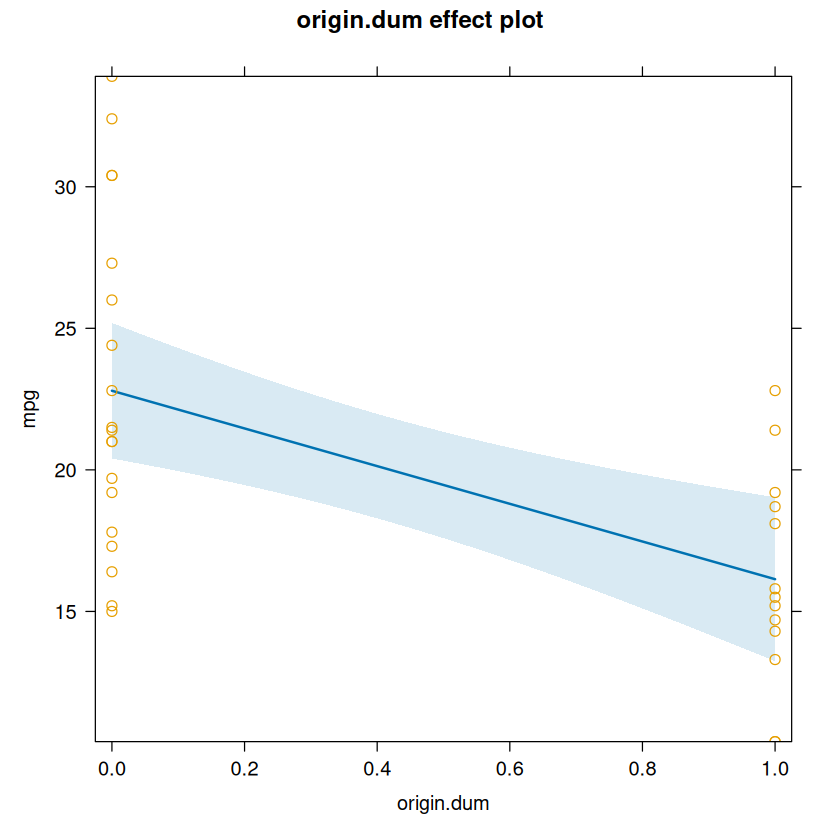

In [5]:
library(effects)
plot(allEffects(dummy.mod, residuals=TRUE), partial.residuals=list(smooth=FALSE))

So, we still have a straight-line fit, as we would expect. The only difference is that the data is constrained to only two values of the predictor. This means that the regression parameters tell us something about our categories of interest. To see exactly what that is, let us examine the two model parameters more closely.

Starting with the intercept, remember that the definition of an intercept is the value of $y$ when $x$ is 0. In this instance, a value of 0 is associated with only a single category (`Other`). As such, the intercept parameter tells us something about the `Other` category. So what does the value of the intercept parameter mean? Well, when using least-squares (or more generally, maximum likelihood), the value that minimises the error when you have a selection of data that shares the same predictor value is simply the *mean*. We can see this from the graph above as the mean is effectively the *middle* point that produces the *smallest* vertical distances between the model fit and the data. Becuase of this, the intercept in a model containing a simple dummy variable is just the *mean of the category coded with a 0*. We can confirm this easily  

In [6]:
mu.other <- mean(mtcars$mpg[mtcars$origin == 'Other']) # sample mean of 'Other'
beta.0   <- coef(dummy.mod)[1]                         # intercept

# compare mean of 'Other' and intercept
print(c(mu.other,beta.0))

            (Intercept) 
   22.79474    22.79474 


So what about the slope? As we can see from the plot above, the regression slope goes from one value of the dummy variable to the other. Remember, the slope parameter is interpreted as the *change* in $y$ for a unit change in $x$. When using a dummy variable, all a "unit change" means is switching from one category to the other. As such, the slope parameter is the change in $y$ when switching from the `Other` category to the `USA` category. As we can see from the plot above, the model fit for the `USA` category (a dummy value of 1) is also the *mean* of that category. Again, this is a feature of least-squares. Putting all this together, the slope parameter is therefore the *mean difference between the categories*. Again, we can confirm this easily 

In [7]:
mu.other <- mean(mtcars$mpg[mtcars$origin == 'Other']) # sample mean of 'Other'
mu.USA   <- mean(mtcars$mpg[mtcars$origin == 'USA'])   # sample mean of 'USA'
mu.diff  <- mu.USA - mu.other                          # mean difference
beta.1   <- coef(dummy.mod)[2]                         # slope parameter

# compare mean difference and slope
print(c(mu.diff,beta.1)) 

           origin.dum 
 -6.656275  -6.656275 


Another way of understanding this is to examine the predicted values for the two different categories: 

$$
\begin{align*}
    \hat{y}^{\text{Other}} &= \beta_{0} + \left(\beta_{1} \times 0\right) = \beta_{0} \\
    \hat{y}^{\text{USA}}   &= \beta_{0} + \left(\beta_{1} \times 1\right) = \beta_{0} + \beta_{1}
\end{align*}
$$

If the predicted value (group mean) for `Other` is $\beta_{0}$ and the predicted value (group mean) for `USA` is $\beta_{0} + \beta_{1}$, then the mean difference has to be

$$
\hat{y}^{\text{USA}} - \hat{y}^{\text{Other}} = \left(\beta_{0} + \beta_{1}\right) - \beta_{0} = \beta_{1}.
$$

Performing the subtraction in other other direction gives you

$$
\hat{y}^{\text{Other}} - \hat{y}^{\text{USA}} = \beta_{0} - \left(\beta_{0} + \beta_{1}\right) = -\beta_{1},
$$

so we can always see the mean difference in the other direction by simply multiplying the slope by -1.

Using this dummy scheme, the predicted values of each category are simply their sample means, which are encoded by the intercept becoming the *mean* of whichever group is coded as 0 (often known as the *reference group*) and the slope becoming the *mean difference* between the groups. From the output above, we can therefore conclude that the average MPG of cars from the rest of the world is around 22.795, with cars from the USA having a *lower* average fuel efficiency by around 6.656 fewer miles to the gallon. This means that the average fuel efficiency of cars from the USA is around $22.795 - 6.656 = 16.139$ MPG.

`````{admonition} Heuristic for Interpreting Regression Parameters
:class: tip
Including dummy variables in a regression leads to model parameters that are most easily interpreted as *mean differences*. Our heuristic for interpretation is therefore that any parameters associated with continuous variables represent traditional *regression slopes*, whereas any parameters associated with categorical variables represent *mean differences*. A model containing both types of variable will therefore contain both types of effect. It is therefore helpful whenever looking at a regression output to dichotomise the effects into those that represent *slopes* and those that represent *means*, in order to aid interpretation.
`````

### Automatic Dummy Variables
As mentioned above, it is unnecessary to construct dummy variables manually as `R` will do it for you. Indeed, letting `R` do it has several benefits. Not only is this going to be more accurate, especially with complex dummy variable situations, but will also create an explicit declaration that the variable in question is categorical. This can be useful elsewhere, because it allows other functions to behave differently in the presence of categorical variables.

In order to get `R` to construct the dummy variables automatically, we simply need to make sure that `R` realises that a certain variable is categorical. This means converting our vector of category labels into a special class of variable that `R` calls a `factor`. When we then enter a `factor` variable into the `lm()` function, `R` will know to convert it into a dummy variable first. Although possible to constuct a `factor` from scratch, it is usually easier to simply convert a vector of category lables using the `as.factor()` function[^factor-foot]. In the example of the `origin` variable, we can convert it like so

In [8]:
mtcars$origin <- as.factor(mtcars$origin)
print(levels(mtcars$origin))

[1] "Other" "USA"  


Here, we replace the variable inside the `mtcars` data frame with the new factor and then we check the levels to make sure the conversion has worked. We can now use this variable like any other in the `lm()` function

In [9]:
dummy.mod <- lm(mpg ~ origin, data=mtcars)
summary(dummy.mod)


Call:
lm(formula = mpg ~ origin, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-7.795 -3.220 -1.117  3.098 11.105 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   22.795      1.173  19.436  < 2e-16 ***
originUSA     -6.656      1.840  -3.617  0.00108 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.112 on 30 degrees of freedom
Multiple R-squared:  0.3037,	Adjusted R-squared:  0.2805 
F-statistic: 13.09 on 1 and 30 DF,  p-value: 0.00108


The output will look identical to the original model fit with the manual dummy variable. However, we can see that the parameter reported is now called `originUSA`. This indicates that the `USA` category has been coded with a 1 and thus the effect can be interpreted as the difference between the reference category (in this example, `Other`) and `USA`. If we want to confirm the coding scheme `R` has used, we can use the `contrasts()` function to return a table giving the values used for each level of the variable.

In [10]:
print(contrasts(mtcars$origin))

      USA
Other   0
USA     1


We can also see that the `effects` package is able to take the categorical nature of `origin` into account when constructing its plot. Rather than given an error band around the regression slope, we have the individual 95% confidence intervals for each category. The $x$-axis is also correctly labelled with the categories, rather than showing the values of the associated dummy variable.

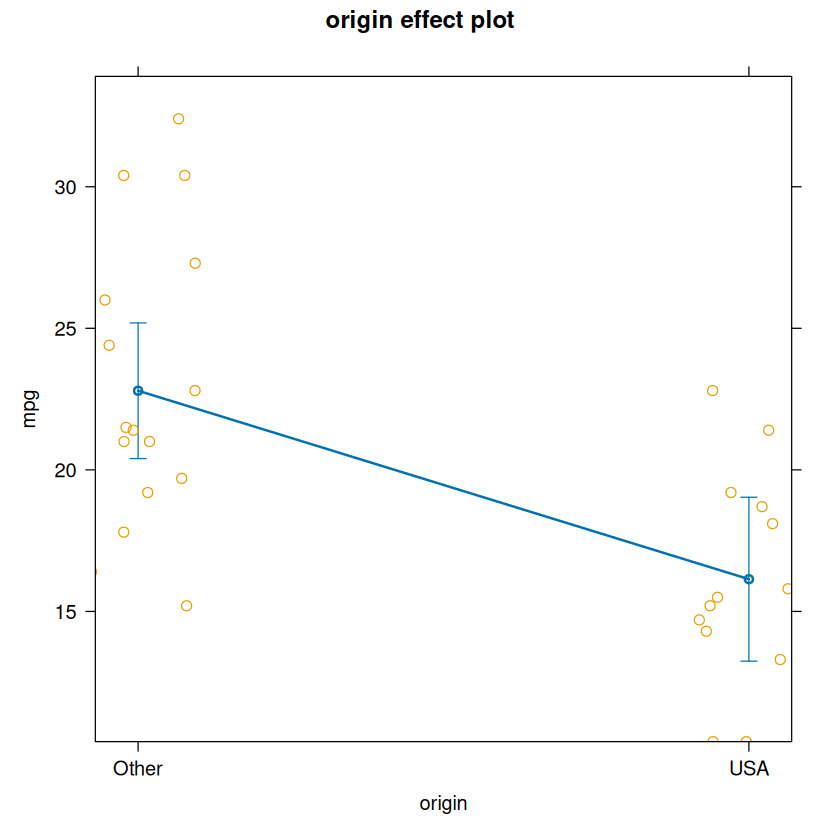

In [11]:
plot(allEffects(dummy.mod, residuals=TRUE), partial.residuals=list(smooth=FALSE))

This is also true of extracting the key values for plotting, if we wanted to create this plot using another package (such as `ggplot2`). For instance, we can extract the means for each category,

In [29]:
eff          <- allEffects(dummy.mod)
origin.means <- eff$origin$fit
print(origin.means)

      [,1]
1 22.79474
2 16.13846


as well as the lower and upper limits of the 95% CIs

In [30]:
origin.CIs <- cbind(eff$origin$lower, eff$origin$upper)
print(origin.CIs)

      [,1]     [,2]
1 20.39949 25.18999
2 13.24274 19.03418


## The Two-sample $t$-Test as a Regression Model
Now we have seen how to include a categorical predictor in a regression model, it is time to make some connections with methods you already know. As a start, the simplest and most well-known method for testing hypotheses about categorical variables is the humble $t$-test. If we wanted to test the null hypothesis that the MPG of cars from the USA is the same as the MPG of cars from the rest of the world, we could generate a traditional $t$-test using

In [13]:
t.test(mpg ~ origin, data=mtcars, var.equal=TRUE)


	Two Sample t-test

data:  mpg by origin
t = 3.6174, df = 30, p-value = 0.00108
alternative hypothesis: true difference in means between group Other and group USA is not equal to 0
95 percent confidence interval:
  2.898297 10.414254
sample estimates:
mean in group Other   mean in group USA 
           22.79474            16.13846 


Now, let us look again at the regression output using a dummy variable

In [14]:
summary(dummy.mod)


Call:
lm(formula = mpg ~ origin, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-7.795 -3.220 -1.117  3.098 11.105 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   22.795      1.173  19.436  < 2e-16 ***
originUSA     -6.656      1.840  -3.617  0.00108 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.112 on 30 degrees of freedom
Multiple R-squared:  0.3037,	Adjusted R-squared:  0.2805 
F-statistic: 13.09 on 1 and 30 DF,  p-value: 0.00108


To see the connection, focus on the regression output for the *slope* parameter. Take a moment to compare the two and see if you can spot the similarities.

Notice that the $t$-statistic (ignoring the sign) and $p$-value are *identical* to the traditional $t$-test. Notice as well that the degrees of freedom, as reported at the bottom of the regression table, are also identical. In fact, the hypothesis test on a dummy variable in a regression model is *exactly the same* as a traditional $t$-test. Because of this, the $t$-test can be subsumed within the framework of linear models. In fact, we can simply think of a $t$-test as a *special case* of linear regression. Although this can seem an overly complex way of arriving at something quite simple, the important points are that

- The $t$-test fits within a general regression framework, meaning we can use the same procedures as before for fitting, plotting and examining assumptions.
- By subsuming the $t$-test within this framework we do not need to treat it as a separate procedure, we can just think of it as the natural result from putting a single dummy variable into a regression model.
- This is the most basic *starting point* for allowing both continuous *and* categorical predictors in the same model, including variables with more than 2 categories and more than a single categorical variable.

In terms of the sign of the $t$-test, notice that it is different between `lm()` and `t.test()`. This makes no difference to the inference and is simply the result of performing the subtraction two different ways (either `Other - USA` or `USA - Other`). To make them identical, we can always use the `relevel()` function to change the coding for `Origin` so that `USA` becomes the reference level (the category coded with a 0). We can do this inside the model formula just to illustrate that the only change is the sign of the estimate and the sign of the $t$-statistic.

In [15]:
summary(lm(mpg ~ relevel(origin, ref="USA"), data=mtcars))


Call:
lm(formula = mpg ~ relevel(origin, ref = "USA"), data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-7.795 -3.220 -1.117  3.098 11.105 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         16.138      1.418  11.382 2.07e-12 ***
relevel(origin, ref = "USA")Other    6.656      1.840   3.617  0.00108 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.112 on 30 degrees of freedom
Multiple R-squared:  0.3037,	Adjusted R-squared:  0.2805 
F-statistic: 13.09 on 1 and 30 DF,  p-value: 0.00108


## Model Assumptions with Dummy Variables
As a final topic in this part of the lesson, we can illustrate how all the model assumptions we discussed last week carry-over when using dummy variables. After all, this is still a regression model with all the same assumptions still present. Indeed, this is useful because it will also show how the $t$-test assumptions naturally form as special cases of the regression assumptions.

To begin with, we can generate all the plots we discussed last week.

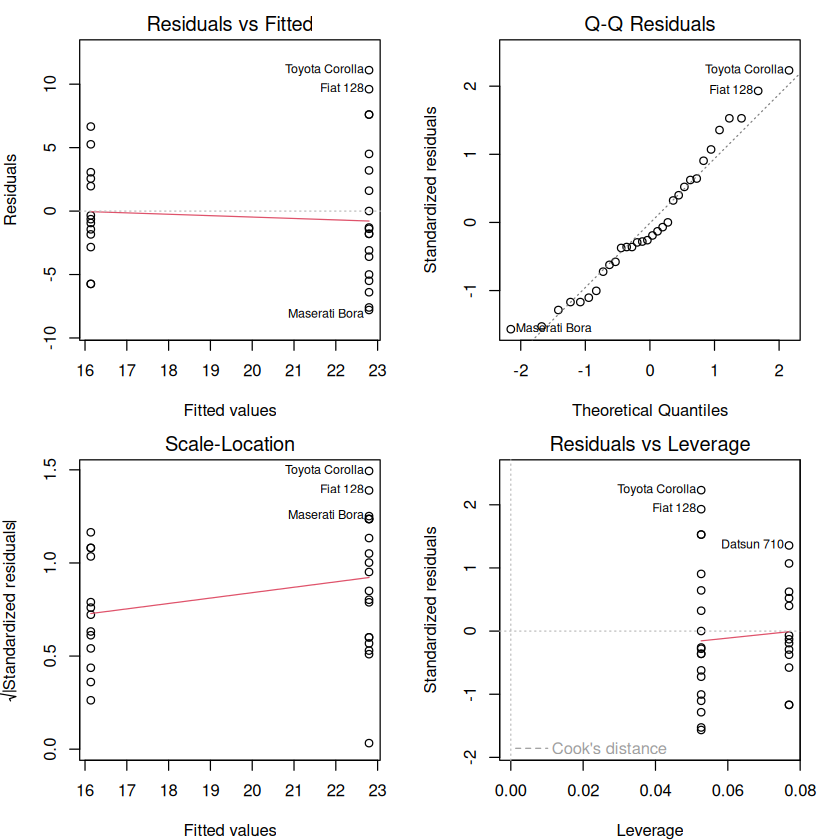

In [16]:
par(mfrow=c(2,2), mar=c(4,4,2,2))
plot(dummy.mod)

To begin with, the *Residuals vs Fitted* plot is less relevant with a simply dummy variable model because the assumption of linearity is always met. All we are doing is drawing a line between the means of the two categories. The values in-between are not meaningful in the sense that a dummy value of 0.5 is not somehow half-way between the two groups. Because of this, there no sense in which having a curved line between the categories would make much sense. 

Moving on to the *Q-Q Residuals* plot, this one *is* relevant for our simple $t$-test model. Remember, the normality assumption can also be thought of as the normality of the outcome variable *conditional* on the values of the predictor. When we have a dummy variable, the predictor only has *two* values, meaning that the assumption is that the data is normally distributed for each value of the dummy variable. In other words, normality is assumed *within each category*. This is a natural simplification of what we have seen before, as illustrated in the 3D scatterplot below.

In [17]:
library(rgl)

# Data

n <- length(mtcars$mpg)

# Open 3D window
open3d()

# Set the desired ranges
xlim <- c(-0.1, 1.1)
ylim <- c(0,50)
zlim <- c(0,.5)

# Plot invisible points to define the bounds
plot3d(NA, xlim=xlim, ylim=ylim, zlim=zlim,
       type="n", axes=FALSE, xlab="", ylab="", zlab="")

# Plot the 3D scatter plot
points3d(origin.dum, mtcars$mpg, rep(0,n), col="red", size=5)

# Regression line
pred <- predict(dummy.mod, newdata=data.frame("origin"=c("Other","USA")))
lines3d(xlim,c(pred[1],pred[2]),c(0,0), lwd=2)

# Overlay the 1D normal distribution curves
n.norms <- c(0,1)
for (i in seq(1,length(n.norms))){
   # Model data
   x.val   <- n.norms[i]
   beta    <- coef(dummy.mod)
   mu      <- beta[1] + beta[2]*x.val
   sigma   <- summary(dummy.mod)$sigma
   
   # Curve data
   y_curve <- seq(ylim[1], ylim[2], length.out=200)
   x_curve <- rep(x.val, length(y_curve))
   z_curve <- dnorm(y_curve, mean=mu, sd=sigma)
   
   # Normal curve
   lines3d(x_curve, y_curve, z_curve, col="blue", lwd=3)
   
   # Mean line
   lines3d(c(x.val,x.val), c(mu,mu), c(0,max(z_curve)), lwd=2, col="green3")
}
 
# Add axes and grid
axes3d(edges=c("x--","y--"), col="black")
grid3d(c("z"), col="gray")

# Add axis labels
mtext3d("Origin (dummy)", edge = "x--", line = 3)
mtext3d("MPG", edge = "y--", line = 3)
 
# Adjust the viewport
mat       <- par3d("userMatrix")
nmat      <- mat
nmat[2,4] <- mat[2,4] + 15  # Move 10 along y
 
# Apply the new matrix to shift the camera
par3d(userMatrix=nmat)
 
# Zoom in
par3d(zoom=0.45)

glX 
  1 

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


In [18]:
rglwidget(width=772)

HTML widgets cannot be represented in plain text (need html)

This is therefore one of the rarer cases where we could easily split the raw data into the two groups and then assess normality within each group. However, this is unnecessary when we can just stick to looking at the standardised residuals as usual. As shown in the QQ-plot, no severe deviations from normality are evident here, though there is evidence of a slightly heavier upper-tail.

In terms of the *Scale-Location* plot, this is also of importance because the traditional $t$-test assumes homogeneity of variance. In other words, that the variance of the population distribution that each group is sampled from is identical. This can be assessed in the same fashion as any other regression model, where we look for an equal scattering of points around the horizontal line. In this instance, there appears to be larger variance (a more dispersed scattering of points) in the `Other` category compared to the `USA` category. 

Finally, for the *Residuals vs Leverage* plot, our main concern is *outliers*. Notice that all data points within the same category have the same amount of leverage. As such, there is little sense in trying to interpret leverage in these types of model. If a single category has high leverage, all that means is that the group average is quite different from the other categories. Given that this is what we are interested in, it does not really matter, especially as this will not just be a single datapoint influencing the fit but a whole *group* of datapoints. Outliers, however, will matter because they will potentially bias the group means. Looking along the vertical axis, however, we can see no points that are particularly extreme, if we use a cut-off of $|t_{i}| > 3$. 

### Unequal Variance
As indicated above, there is some evidence in this example of heterogeneity of variance. One disadvantage of taking a regression approach to the $t$-test is that we forego the correction for heterogeneity that is built-in to the `t.test()` function. Switching `var.equal=FALSE` results in what is known as a Welch's $t$-test, named after the originator of the correction. For example

In [19]:
t.test(mpg ~ origin, data=mtcars, var.equal=FALSE)


	Welch Two Sample t-test

data:  mpg by origin
t = 3.9125, df = 29.961, p-value = 0.0004862
alternative hypothesis: true difference in means between group Other and group USA is not equal to 0
95 percent confidence interval:
  3.181614 10.130937
sample estimates:
mean in group Other   mean in group USA 
           22.79474            16.13846 


Notice that this had changed the $t$-value, degrees of freedom and the $p$-value, after accommodating the variance difference between the groups.

To get the same result using the regression framework, we need to use the `gls()` function from `nlme` to fit a *generalised least squares* model, as covered in the synchronous session last week. In the example below, we specify the `weights` structure in terms of a separate variance term for each level of `origin`.

In [20]:
library(nlme)
mod.var.unequal <- gls(mpg ~ origin, data=mtcars, weights=varIdent(form=~1|origin))
summary(mod.var.unequal)

Generalized least squares fit by REML
  Model: mpg ~ origin 
  Data: mtcars 
       AIC      BIC    logLik
  194.0976 199.7024 -93.04879

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | origin 
 Parameter estimates:
    Other       USA 
1.0000000 0.6507285 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) 22.794737  1.337110 17.047770   0e+00
originUSA   -6.656275  1.701277 -3.912517   5e-04

 Correlation: 
          (Intr)
originUSA -0.786

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.5130449 -0.6496800 -0.2307244  0.6997941  1.9053951 

Residual standard error: 5.828326 
Degrees of freedom: 32 total; 30 residual

As we can see, the $t$-value and associated $p$-value are now practically the same as the Welch's $t$-test. This is an important results because it means that, going forward, we have a method to accommodate heterogeneity of variance within regression, $t$-test, ANOVA and ANCOVA models. 

[^factor-foot]: In the early days of `R`, the humble `read.csv()` function would convert any variable containing text to a factor automatically as the `stringsAsFactors` options was set to `TRUE` by default. This is not always desirable behaviour and so more recent versions of `R` changed this so that `stringsAsFactors=FALSE` by default. However, if you know that your dataset contains factors in the form of text variables, you can switch this back on again and save yourself a little bit of time manually converting the variables.